#EYMEN CELIKTURK-2020400165

##DAY1 Q1

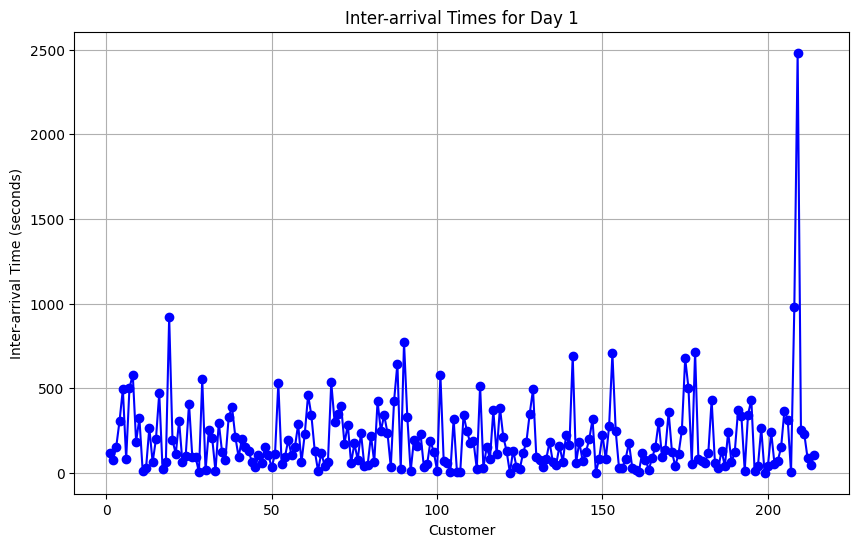

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'IE306_HW2_Fall2024_Dataset(1).xlsx'
data = pd.read_excel(file_path, header=1)
# Convert Day 1 timestamps to datetime
data['Day 1'] = pd.to_datetime(data['Day 1'], errors='coerce')

# Calculate inter-arrival times (in seconds)
data['Inter-arrival Time (s)'] = data['Day 1'].diff().dt.total_seconds()

# Plot inter-arrival times
plt.figure(figsize=(10, 6))
plt.plot(data['Inter-arrival Time (s)'], marker='o', linestyle='-', color='b')
plt.title("Inter-arrival Times for Day 1")
plt.xlabel("Customer")  
plt.ylabel("Inter-arrival Time (seconds)")
plt.grid(True)
plt.show()



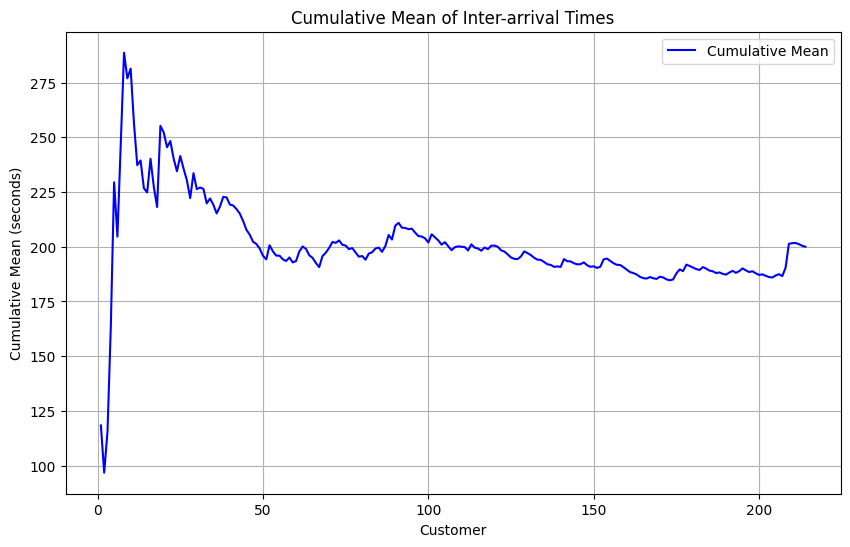

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'IE306_HW2_Fall2024_Dataset(1).xlsx'
data = pd.read_excel(file_path, header=1)

# Convert Day 1 timestamps to datetime
data['Day 1'] = pd.to_datetime(data['Day 1'], errors='coerce')

# Calculate inter-arrival times (in seconds)
data['Inter-arrival Time (s)'] = data['Day 1'].diff().dt.total_seconds()

# Calculate the cumulative mean of inter-arrival times
data['Cumulative Mean (s)'] = data['Inter-arrival Time (s)'].expanding().mean()

# Plot the cumulative mean
plt.figure(figsize=(10, 6))
plt.plot(data.index[1:], data['Cumulative Mean (s)'][1:], color='b', label='Cumulative Mean')

# Add titles, labels, and legend
plt.title("Cumulative Mean of Inter-arrival Times")
plt.xlabel("Customer")
plt.ylabel("Cumulative Mean (seconds)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


##OBSERVATION

When examining the graph, we notice that the inter-arrival times fluctuate around a consistent mean, aside from the outlier at the end. Additionally, we observe that as more data is included, the cumulative mean stabilizes and converges near the sample mean of 200 seconds.

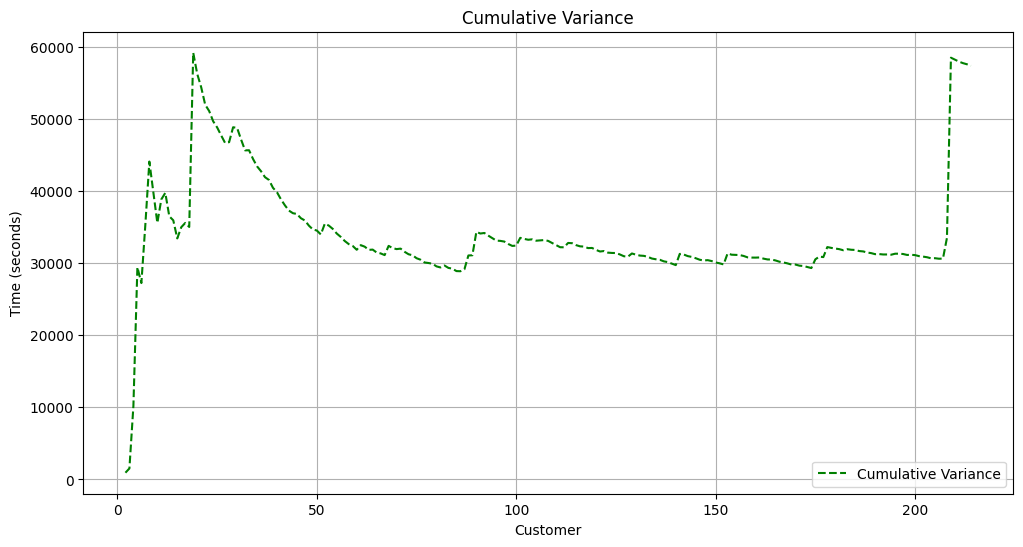

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'IE306_HW2_Fall2024_Dataset(1).xlsx'
data = pd.read_excel(file_path, header=1)

# Convert Day 1 timestamps to datetime
data['Day 1'] = pd.to_datetime(data['Day 1'], errors='coerce')

# Calculate inter-arrival times (in seconds)
data['Inter-arrival Time (s)'] = data['Day 1'].diff().dt.total_seconds()

# Calculate the cumulative Mean of inter-arrival times
data['Cumulative Variance (s^2)'] = data['Inter-arrival Time (s)'].expanding().var()

# Plot inter-arrival times
plt.figure(figsize=(12, 6))

# Add the cumulative variance as a line
plt.plot(data.index[1:], data['Cumulative Variance (s^2)'][1:], label='Cumulative Variance', color='g', linestyle='--')

# Add titles, labels, and legend
plt.title("Cumulative Variance")
plt.xlabel("Customer")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


##OBSERVATION

Looking at the graph, we can observe that the inter-arrival times fluctuate around a steady mean, with the exception of an outlier at the end. Additionally, after the initial steps, the cumulative mean stabilizes and converges near the sample mean of 200 seconds.

##DAY1 Q2

In [7]:
import pandas as pd
from scipy.stats import kstest
import numpy as np

# Load the data (assume inter-arrival times are already calculated as in previous examples)
file_path = 'IE306_HW2_Fall2024_Dataset(1).xlsx'
data = pd.read_excel(file_path, header=1)

# Convert Day 1 timestamps to datetime and calculate inter-arrival times
data['Day 1'] = pd.to_datetime(data['Day 1'], errors='coerce')
data['Inter-arrival Time (s)'] = data['Day 1'].diff().dt.total_seconds()

# Extract the inter-arrival times (drop NaN values)
inter_arrival_times = data['Inter-arrival Time (s)'].dropna()

# Perform Kolmogorov-Smirnov test for U(0, 300)
ks_stat, p_value = kstest(inter_arrival_times, 'uniform', args=(0, 300))

# Compute critical value (1.36 / sqrt(n))
n = len(inter_arrival_times)
critical_value = 1.36 / np.sqrt(n)

# Print results
print(f"KS Statistic (Dmax): {ks_stat}")
print(f"Critical Value: {critical_value}")
print(f"P-value: {p_value}")

# Interpretation based on critical value and KS statistic
if ks_stat > critical_value:
    print("Reject H0: The data does not follow a uniform distribution between 0 and 300 seconds.")
else:
    print("Fail to reject H0: The data may follow a uniform distribution between 0 and 300 seconds.")


KS Statistic (Dmax): 0.23364485981308414
Critical Value: 0.0929676860753542
P-value: 9.316299866485666e-11
Reject H0: The data does not follow a uniform distribution between 0 and 300 seconds.


The Kolmogorov-Smirnov (KS) test results show a KS Statistic (Dmax) of 0.2336, which exceeds the critical value of 0.0930. Additionally, the p-value is extremely small, indicating strong evidence against the null hypothesis (H0​). Therefore, we reject H0​ and conclude that the data does not follow a uniform distribution between 0 and 300 seconds.

##DAY1 Q3

In [8]:
# Calculate basic descriptive statistics
mean = inter_arrival_times.mean()
std_dev = inter_arrival_times.std()
minimum = inter_arrival_times.min()
maximum = inter_arrival_times.max()
median = inter_arrival_times.median()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Median: {median}")


Mean: 200.0191214953271
Standard Deviation: 239.47244465073481
Minimum: 0.112
Maximum: 2482.656
Median: 127.28899999999999


##DAY1 Q4

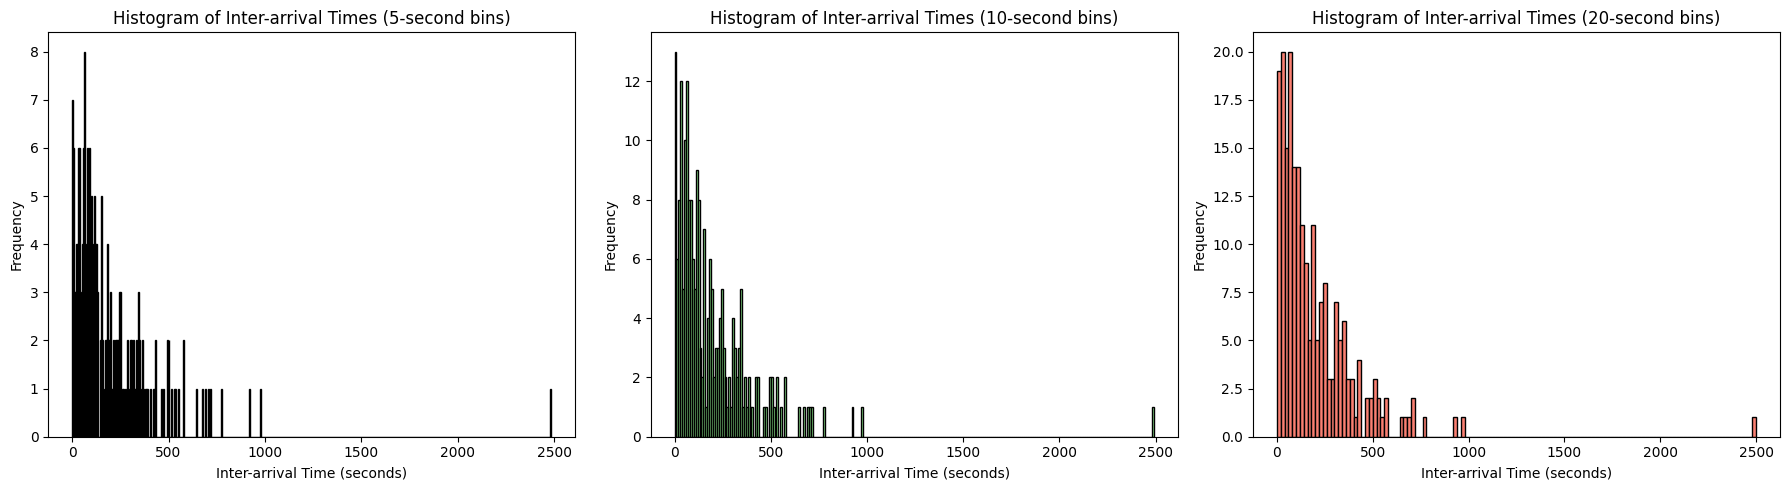

In [14]:
import matplotlib.pyplot as plt

# Plot frequency histograms for different bin sizes
plt.figure(figsize=(18, 5))

# Histogram with 5-second bins
plt.subplot(1, 3, 1)
plt.hist(inter_arrival_times, bins=range(0, int(maximum) + 5, 5), color='skyblue', edgecolor='black')
plt.title("Histogram of Inter-arrival Times (5-second bins)")
plt.xlabel("Inter-arrival Time (seconds)")
plt.ylabel("Frequency")

# Histogram with 10-second bins
plt.subplot(1, 3, 2)
plt.hist(inter_arrival_times, bins=range(0, int(maximum) + 10, 10), color='lightgreen', edgecolor='black')
plt.title("Histogram of Inter-arrival Times (10-second bins)")
plt.xlabel("Inter-arrival Time (seconds)")
plt.ylabel("Frequency")

# Histogram with 20-second bins
plt.subplot(1, 3, 3)
plt.hist(inter_arrival_times, bins=range(0, int(maximum) + 20, 20), color='salmon', edgecolor='black')
plt.title("Histogram of Inter-arrival Times (20-second bins)")
plt.xlabel("Inter-arrival Time (seconds)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The first histogram, with five-second bins, provides the most detailed view of the inter-arrival times. However, the high granularity makes it difficult to interpret the distribution, as many intervals contain only one or no data points, leading to a fragmented appearance.

The second histogram, with ten-second bins, offers a more balanced view. It smooths out some of the noise seen in the first histogram, making the distribution easier to interpret. While it still shows some variability, the overall pattern becomes more apparent.

The third histogram, with twenty-second bins, has the lowest sensitivity. It smooths out most of the fluctuations, eliminating smaller peaks and valleys. This makes it easier to observe the general distribution, but some finer details of the data are lost.

Despite the differences in granularity across the histograms, they all suggest that the inter-arrival times follow an exponential-like distribution.

##DAY1 Q5

In [9]:
import numpy as np
from scipy.stats import chisquare

# Set up parameters for exponential distribution
lambda_param = 1 / 200  # Lambda value derived from mean inter-arrival time (1/mean)
observed_freq, bin_edges = np.histogram(inter_arrival_times, bins=10)

# Calculate expected frequencies
expected_freq = []
total_count = len(inter_arrival_times)
for i in range(len(bin_edges) - 1):
    p_bin = np.exp(-lambda_param * bin_edges[i]) - np.exp(-lambda_param * bin_edges[i + 1])
    expected_freq.append(p_bin * total_count)  # Expected count for each bin

# Normalize expected frequencies so their sum matches the observed frequency sum
expected_sum = sum(expected_freq)
observed_sum = sum(observed_freq)
expected_freq = [e * (observed_sum / expected_sum) for e in expected_freq]

# Perform chi-square test
chi_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)

# Output results
print(f"Chi-Square Statistic: {chi_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The data does not follow an exponential distribution.")
else:
    print("Fail to reject the null hypothesis: The data may follow an exponential distribution.")


Chi-Square Statistic: 466.87848246118443
P-value: 7.048914009494017e-95
Reject the null hypothesis: The data does not follow an exponential distribution.


The chi-square test was performed to evaluate whether the inter-arrival times follow an exponential distribution. The test produced a chi-square statistic of 466.8785, which is significantly higher than the critical value at the 5% significance level. Additionally, the p-value was 7.05e-95, which is far below 0.05. These results strongly indicate that the null hypothesis must be rejected. Thus, we conclude that the data does not follow an exponential distribution.

##DAY1 Q6

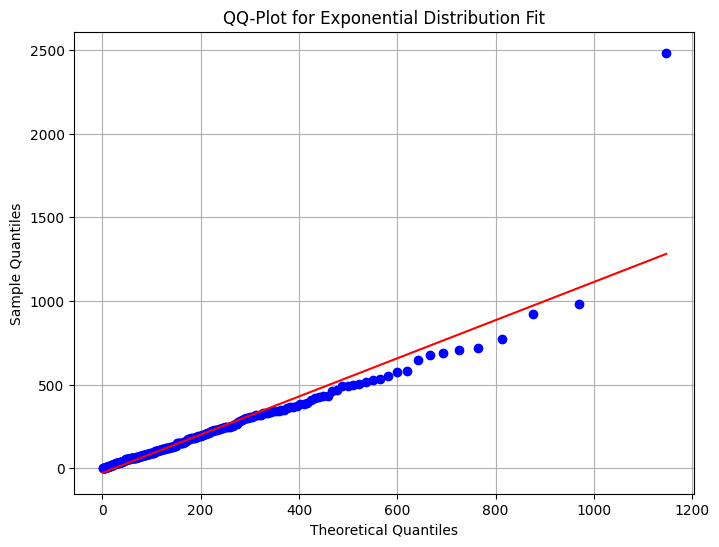

In [8]:
import scipy.stats as stats

# Load the data with header in the second row
file_path = 'IE306_HW2_Fall2024_Dataset(1).xlsx'
data = pd.read_excel(file_path, header=1)

# Convert Day 1 timestamps to datetime and calculate inter-arrival times
data['Day 1'] = pd.to_datetime(data['Day 1'], errors='coerce')
data['Day 2'] = pd.to_datetime(data['Day 2'], errors='coerce')
data['Inter-arrival Time (s)'] = data['Day 1'].diff().dt.total_seconds()
data['Inter-arrival Time Day 2 (s)'] = data['Day 2'].diff().dt.total_seconds()

# Remove the first row (NaN) from inter-arrival times
inter_arrival_times = data['Inter-arrival Time (s)'].dropna()

# Calculate the mean of inter-arrival times for exponential distribution
mean = inter_arrival_times.mean()

# Generate the QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(inter_arrival_times, dist="expon", sparams=(0, mean), plot=plt)
plt.title("QQ-Plot for Exponential Distribution Fit")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()


The QQ-plot compares the sample quantiles of the inter-arrival times to the theoretical quantiles of an exponential distribution. While the lower and middle values align reasonably with the red reference line, the extreme upper tail deviates significantly, indicating that the data does not perfectly follow an exponential distribution. This aligns with the earlier chi-square test results.

##DAY2 Q1

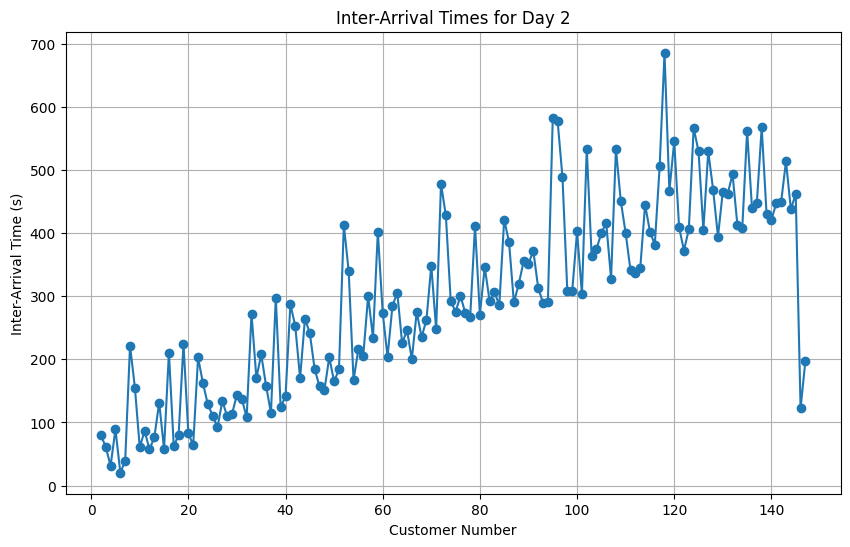

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['Customer no'], data['Inter-arrival Time Day 2 (s)'], marker='o', linestyle='-')
plt.title("Inter-Arrival Times for Day 2")
plt.xlabel("Customer Number")
plt.ylabel("Inter-Arrival Time (s)")
plt.grid(True)
plt.show()

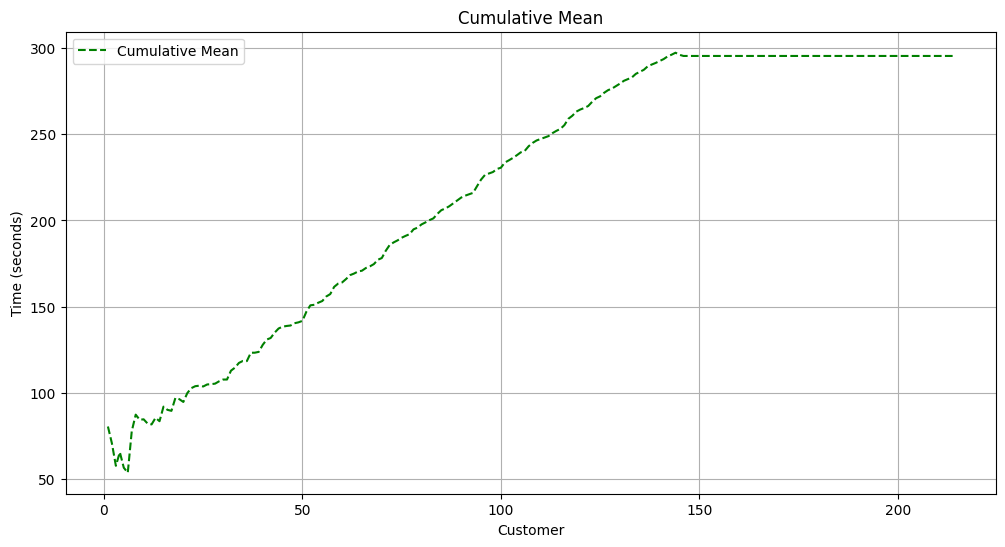

In [13]:
# Calculate inter-arrival times (in seconds)
data['Inter-arrival Time (s)'] = data['Day 2'].diff().dt.total_seconds()

# Calculate the cumulative Mean of inter-arrival times
data['Cumulative Mean (s^2)'] = data['Inter-arrival Time (s)'].expanding().mean()

# Plot inter-arrival times
plt.figure(figsize=(12, 6))

# Add the cumulative Mean as a line
plt.plot(data.index[1:], data['Cumulative Mean (s^2)'][1:], label='Cumulative Mean', color='g', linestyle='--')

# Add titles, labels, and legend
plt.title("Cumulative Mean")
plt.xlabel("Customer")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

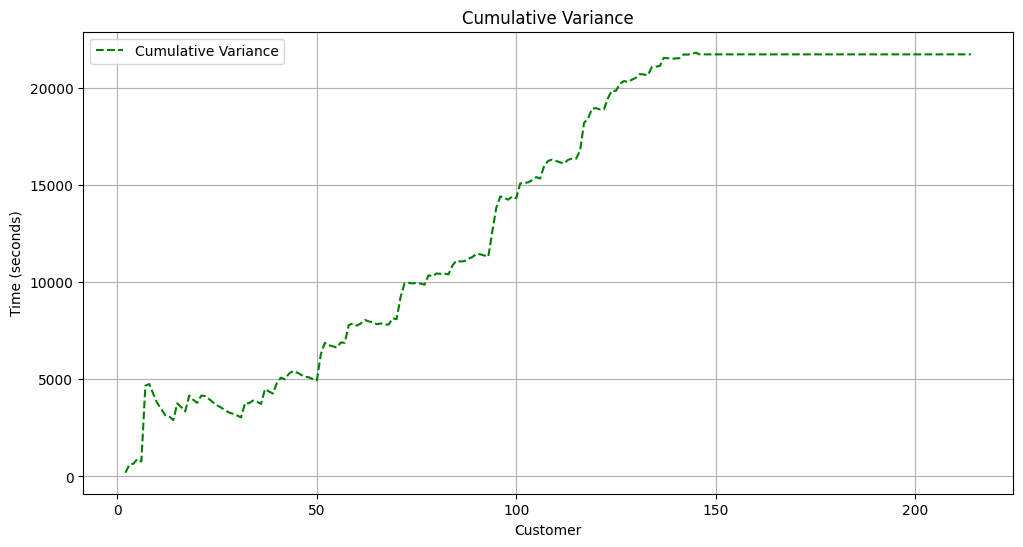

In [11]:
# Calculate inter-arrival times (in seconds)
data['Inter-arrival Time (s)'] = data['Day 2'].diff().dt.total_seconds()

# Calculate the cumulative variance of inter-arrival times
data['Cumulative Variance (s^2)'] = data['Inter-arrival Time (s)'].expanding().var()

# Plot inter-arrival times
plt.figure(figsize=(12, 6))

# Add the cumulative variance as a line
plt.plot(data.index[1:], data['Cumulative Variance (s^2)'][1:], label='Cumulative Variance', color='g', linestyle='--')

# Add titles, labels, and legend
plt.title("Cumulative Variance")
plt.xlabel("Customer")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

When examining the graph, it is clear that the inter-arrival times exhibit an increasing trend. The dataset lacks a stationary mean, as observed in the cumulative mean, which consistently rises after the initial steps. A similar pattern is evident for the variance, which also follows an increasing trend, indicating the absence of stationary variance.

##DAY2 Q2

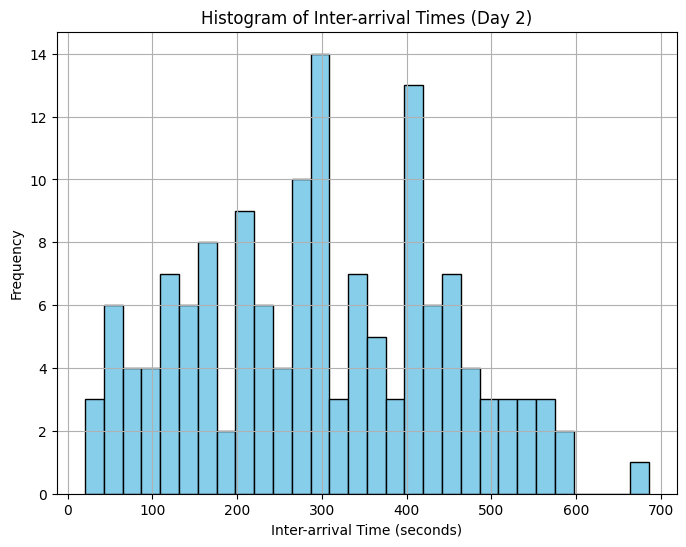

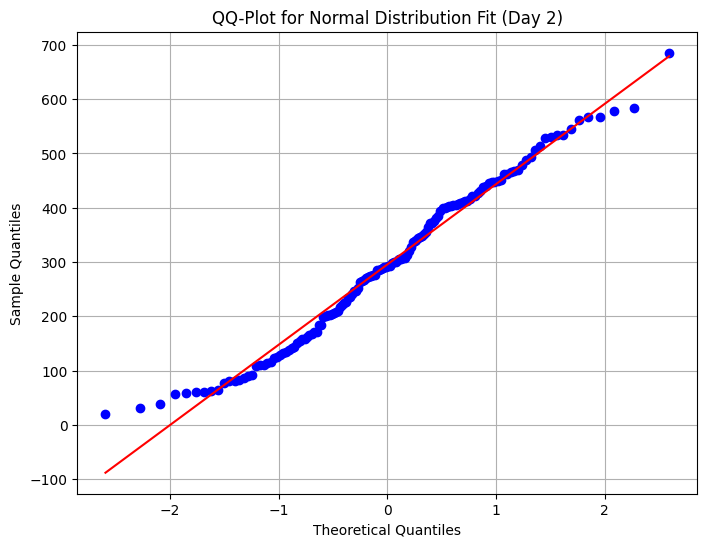

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

# Load the data with the second row as the header
file_path = 'IE306_HW2_Fall2024_Dataset(1).xlsx'
data = pd.read_excel(file_path, header=1)

# Convert Day 2 timestamps to datetime and calculate inter-arrival times
data['Day 2'] = pd.to_datetime(data['Day 2'], errors='coerce')
data['Inter-arrival Time Day 2 (s)'] = data['Day 2'].diff().dt.total_seconds()

# Remove NaN values from inter-arrival times
inter_arrival_times_day2 = data['Inter-arrival Time Day 2 (s)'].dropna()

# Plot the distribution of inter-arrival times
plt.figure(figsize=(8, 6))
plt.hist(inter_arrival_times_day2, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Inter-arrival Times (Day 2)')
plt.xlabel('Inter-arrival Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# QQ-Plot for Day 2
mean_day2 = inter_arrival_times_day2.mean()
plt.figure(figsize=(8, 6))
stats.probplot(inter_arrival_times_day2, dist="norm", plot=plt)
plt.title("QQ-Plot for Normal Distribution Fit (Day 2)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()




It looks like a normal distribution. We can use the qq plot and chi square test (since n>50 ).

The qq plot fits the x=y line so we can say qq plot confirms normal distribution.

In [17]:
# Chi-Square Goodness-of-Fit Test
observed_freq, bin_edges = np.histogram(inter_arrival_times_day2, bins=10)
expected_freq = []
total_count = len(inter_arrival_times_day2)
mean_day2 = inter_arrival_times_day2.mean()
std_day2 = inter_arrival_times_day2.std()

# Calculate expected frequencies assuming normal distribution
for i in range(len(bin_edges) - 1):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    p_bin = stats.norm.cdf(upper_bound, loc=mean_day2, scale=std_day2) - \
            stats.norm.cdf(lower_bound, loc=mean_day2, scale=std_day2)
    expected_freq.append(p_bin * total_count)

# Scale expected frequencies to match observed frequencies sum
expected_freq = np.array(expected_freq)
observed_sum = sum(observed_freq)
expected_sum = sum(expected_freq)
expected_freq = expected_freq * (observed_sum / expected_sum)

# Perform Chi-Square Test
chi_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print(f"Chi-Square Statistic: {chi_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data may follow a normal distribution.")


Chi-Square Statistic: 8.011346055343912
P-value: 0.5330032117103471
Fail to reject the null hypothesis: The data may follow a normal distribution.


The chi square also confirms its normal distribution.